### Import libraries and set global options

In [263]:
from importlib import import_module
import logging
from os import path
import sys
import warnings

logging.disable(logging.CRITICAL)
warnings.filterwarnings('ignore')

SCRIPT_DIR = path.dirname(path.abspath('__file__'))
sys.path.append(path.dirname(SCRIPT_DIR))
sys.dont_write_bytecode = True

In [264]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from library.model_persistence import load_model

from typing import Any, Union


%matplotlib inline

In [265]:
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)

seed = 90

random.seed(seed)
np.random.seed(seed)

### Define some helpers

### Define global variables

In [266]:
DATASETS_PATH = path.realpath(path.join(SCRIPT_DIR, '..', '..', 'dataset'))

RESULTS_PATH = path.realpath(path.join(SCRIPT_DIR, '..', '..', 'results'))

In [267]:
datasets = {
    'mean_mape': pd.read_csv(path.join(RESULTS_PATH, 'ensemble_preds_mean_MAPE.csv'), index_col='number'),
    'mean_rmse': pd.read_csv(path.join(RESULTS_PATH, 'ensemble_preds_mean_RMSE.csv'), index_col='number'),
    'median_mape': pd.read_csv(path.join(RESULTS_PATH, 'ensemble_preds_median_MAPE.csv'), index_col='number'),
    'median_rmse': pd.read_csv(path.join(RESULTS_PATH, 'ensemble_preds_median_RMSE.csv'), index_col='number')
}

In [268]:
title_case = lambda col_name: ' '.join(col_name.split('_')).title()

def set_empty_val(df, indx):
    df.loc[indx] = 0 if indx not in df.index else df.loc[indx]
    return df.sort_index(ascending = False)

def get_forecast_cm(df, col):
    tmp_df = df[col].reset_index()
    tmp_df['condition'] = tmp_df.number.map(lambda value: int(value.startswith('condition')))
    return np.array([
        set_empty_val(
            set_empty_val(
                tmp_df[tmp_df[col] >= 0.5].groupby('condition').count()[col],
                0,
            ),
            1
        ).to_numpy(),
        set_empty_val(
            set_empty_val(
                tmp_df[tmp_df[col] < 0.5].groupby('condition').count()[col],
                0,
            ),
            1
        ).to_numpy(),
    ]).T

def plot_forcast_cm(ax, df, col):
    data = get_forecast_cm(df, col)
    ax.matshow(
        data,
        cmap=plt.get_cmap('Pastel2')
    )
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(
                x = j,
                y = i,
                s = data[i, j],
                va = 'center',
                ha = 'center',
                size = 'xx-large'
            )

    ax.grid(None)
    ax.tick_params(axis = 'x', bottom = False)
    ax.set_xticks([0, 1], ['P >= 0.5', 'P < 0.5'], minor = False, ha='center')
    ax.set_yticks([0, 1], ['condition', 'control'], minor = False, rotation = 90, va='center')
    ax.set_xlabel(f' Prediction for next {title_case(col)}', fontweight = 'light', labelpad = 10)


### Cassification Model: 1H:mean:zscore-robust:no

#### Forecast Model: mean:MAPE

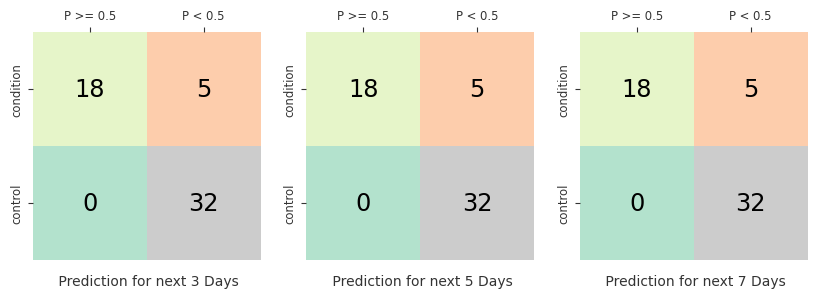

In [269]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
plot_forcast_cm(axes[0], datasets['mean_mape'], '3_days')
plot_forcast_cm(axes[1], datasets['mean_mape'], '5_days')
plot_forcast_cm(axes[2], datasets['mean_mape'], '7_days')
plt.show()

#### Forecast Model: mean:RMSE

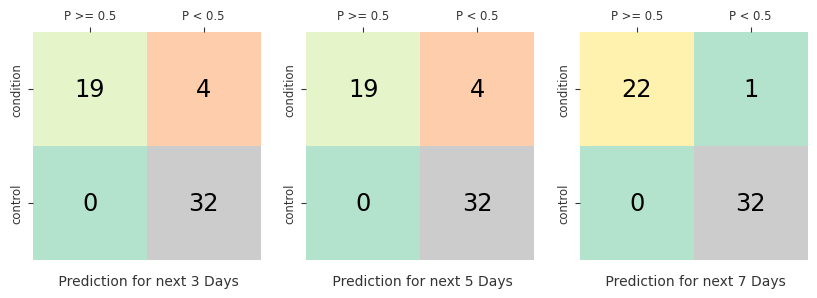

In [270]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
plot_forcast_cm(axes[0], datasets['mean_rmse'], '3_days')
plot_forcast_cm(axes[1], datasets['mean_rmse'], '5_days')
plot_forcast_cm(axes[2], datasets['mean_rmse'], '7_days')
plt.show()

### Cassification Model: 1H:median:zscore:yes

#### Forecast Model: median:MAPE

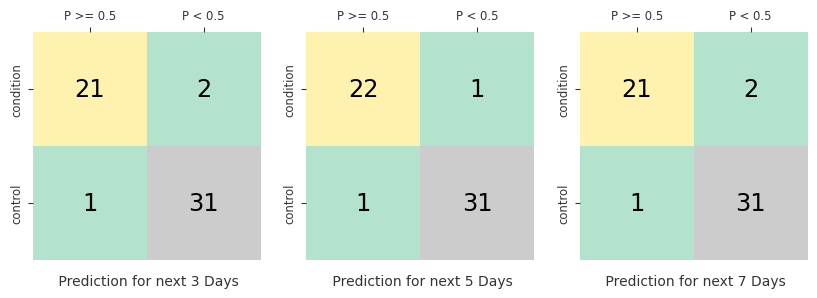

In [271]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
plot_forcast_cm(axes[0], datasets['median_mape'], '3_days')
plot_forcast_cm(axes[1], datasets['median_mape'], '5_days')
plot_forcast_cm(axes[2], datasets['median_mape'], '7_days')
plt.show()

#### Forecast Model: median:RMSE

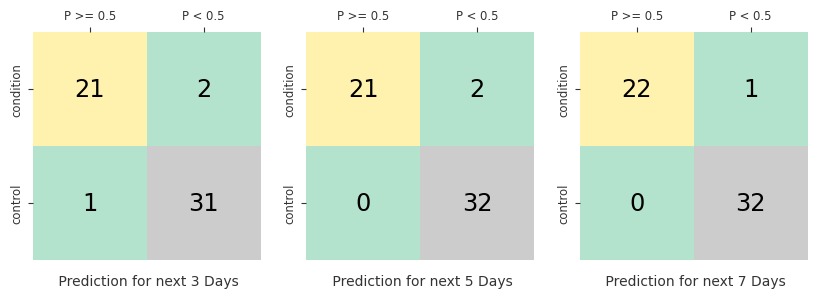

In [272]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
plot_forcast_cm(axes[0], datasets['median_rmse'], '3_days')
plot_forcast_cm(axes[1], datasets['median_rmse'], '5_days')
plot_forcast_cm(axes[2], datasets['median_rmse'], '7_days')
plt.show()